## Install

In [8]:
!pip3 install torch torchvision numpy

## Imports

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import torch as th
from torch import nn

## Toy Dataset

In [0]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Linear Regression Model

In [0]:
# Hyper-params
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = th.optim.SGD(model.parameters(), lr=learning_rate)

## Model Training

In [12]:
for epoch in range(num_epochs):
  inputs = th.from_numpy(x_train)
  targets = th.from_numpy(y_train)
  
  # Forward pass.
  outputs = model(inputs)
  loss = loss_fn(outputs, targets)
  
  # Backward and optimize.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  if (epoch + 1) % 5 == 0:
    print(f'Epoch [{epoch + 1} / {num_epochs}], loss: {loss.item()}')

Epoch [5 / 60], loss: 35.53144454956055
Epoch [10 / 60], loss: 14.548900604248047
Epoch [15 / 60], loss: 6.048390865325928
Epoch [20 / 60], loss: 2.604557752609253
Epoch [25 / 60], loss: 1.2092671394348145
Epoch [30 / 60], loss: 0.643875002861023
Epoch [35 / 60], loss: 0.41468825936317444
Epoch [40 / 60], loss: 0.3217039704322815
Epoch [45 / 60], loss: 0.2838979661464691
Epoch [50 / 60], loss: 0.26844605803489685
Epoch [55 / 60], loss: 0.2620505094528198
Epoch [60 / 60], loss: 0.25932401418685913


## Plot graph

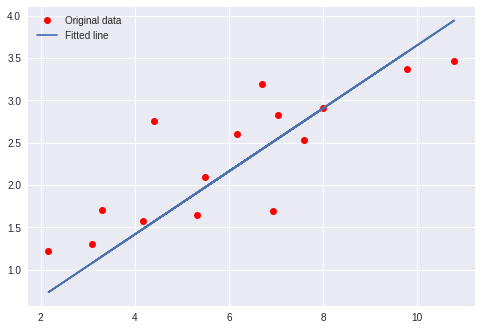

In [13]:
predicted = model(th.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

## Save model checkpoint

In [0]:
th.save(model.state_dict(), '/tmp/model.ckpt')